In [71]:
import time
#import pydoocs
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
#import cv2
import seaborn as sns
import struct
import pprint

In [72]:
f=h5py.File('PBD2_VRFD_pbd2_stream_6_run52040_file117_20240227T153436.hdf5', 'r+')
f.keys()

<KeysViewHDF5 ['FLASH.DIAG', 'FLASH.SDIAG']>

In [73]:
print(f['FLASH.SDIAG'].keys())
print(f['FLASH.SDIAG/BAM.DAQ'].keys())
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE'].keys())
print()
print(f['FLASH.SDIAG/BCM.DAQ'].keys())
print(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1'].keys())

<KeysViewHDF5 ['BAM.DAQ', 'BCM.DAQ']>
<KeysViewHDF5 ['FL0.DBC1.ARRIVAL_TIME.RELATIVE', 'FL0.DBC2.ARRIVAL_TIME.RELATIVE', 'FL2.SEED5.ARRIVAL_TIME.RELATIVE']>
<KeysViewHDF5 ['TimeStamp', 'TrainId', 'Value']>

<KeysViewHDF5 ['FL0.DBC1.1', 'FL0.DBC1.2', 'FL0.DBC2.1', 'FL0.DBC2.2', 'FL2.SEED5.1', 'FL2.SEED5.2']>
<KeysViewHDF5 ['COMPRESSION.TD', 'COMPRESSION.normalized.TD', 'TimeStamp', 'TrainId']>


In [74]:
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TimeStamp']
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/TimeStamp']

In [75]:
print(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1'].keys())

<KeysViewHDF5 ['COMPRESSION.TD', 'COMPRESSION.normalized.TD', 'TrainId']>


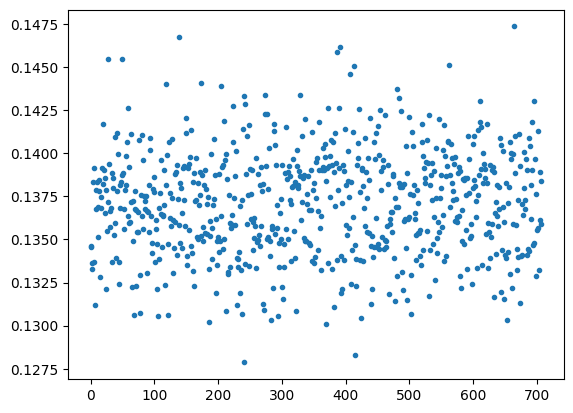

In [76]:
plt.plot(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD'][:,1467], '.')

In [77]:
LL=np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD'][0,:])
print(LL[0][-3])
Id=LL[0][-3]
#f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD'][0,1467:1474]

1467


In [78]:
#Id=1467
DBCM11_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.normalized.TD', data=DBCM11_normalized)

DBCM12_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.normalized.TD', data=DBCM12_normalized)

DBCM21_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.normalized.TD', data=DBCM21_normalized)

DBCM22_normalized=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.normalized.TD', data=DBCM22_normalized)

DBCM51_normalized=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD', data=DBCM51_normalized)

DBCM52_normalized=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.normalized.TD', data=DBCM52_normalized)



In [79]:
#Id=1467
DBCM11=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/COMPRESSION.TD', data=DBCM11)

DBCM12=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/COMPRESSION.TD', data=DBCM12)

DBCM21=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.1/COMPRESSION.TD', data=DBCM21)

DBCM22=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/COMPRESSION.TD', data=DBCM22)

DBCM51=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD', data=DBCM51)

DBCM52=f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.TD'][:,Id]
del f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.TD']
dset = f.create_dataset('FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/COMPRESSION.TD', data=DBCM52)


In [80]:
TrainIdBCM11=f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/TrainId'][:]
print(np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/TrainId'][:]-f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.1/TrainId'][:]))
print(np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/TrainId'][:]-f['FLASH.SDIAG/BCM.DAQ/FL0.DBC1.2/TrainId'][:]))
print(np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL0.DBC2.2/TrainId'][:]-f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TrainId'][:]))
print(np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TrainId'][:]-f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.2/TrainId'][:]))
# they are sychnorized :)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [81]:
f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD']

<HDF5 dataset "COMPRESSION.normalized.TD": shape (708,), type "<f4">

In [82]:
#BAM ---------------
print(f['FLASH.SDIAG/BAM.DAQ'].keys())
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE'].keys())
f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value']
#print()

<KeysViewHDF5 ['FL0.DBC1.ARRIVAL_TIME.RELATIVE', 'FL0.DBC2.ARRIVAL_TIME.RELATIVE', 'FL2.SEED5.ARRIVAL_TIME.RELATIVE']>
<KeysViewHDF5 ['TimeStamp', 'TrainId', 'Value']>


<HDF5 dataset "Value": shape (708, 7222), type "<f4">

In [83]:
LL=np.nonzero(f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][0,:])
#plt.plot(f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][9,:])
print(LL)

(array([4320, 4329, 4338]),)


In [84]:
f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][0,LL[0][0]]

914.8935

In [85]:
Id=LL[0][0]
print(LL[:])
print(LL[0][0])
Id=LL[0][0]

(array([4320, 4329, 4338]),)
4320


In [86]:
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/TimeStamp']
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/TimeStamp']
del f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/TimeStamp']

In [61]:
BAM_DBC1=f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value'][:,Id];
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value']
dset = f.create_dataset('FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value', data=BAM_DBC1)

BAM_DBC2=f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/Value'][:,Id];
del f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/Value']
dset = f.create_dataset('FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/Value', data=BAM_DBC2)

BAM_DBC5=f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value'][:,Id];
del f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value']
dset = f.create_dataset('FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/Value', data=BAM_DBC5)


In [62]:
print(np.nonzero(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/TrainId'][:]-
                 f['FLASH.SDIAG/BAM.DAQ/FL0.DBC2.ARRIVAL_TIME.RELATIVE/TrainId'][:]))
print(np.nonzero(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/TrainId'][:]-
                 f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/TrainId'][:]))

# all are sichronized 

(array([], dtype=int64),)
(array([], dtype=int64),)


In [63]:
print(np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TrainId'][:]-
                 f['FLASH.SDIAG/BAM.DAQ/FL2.SEED5.ARRIVAL_TIME.RELATIVE/TrainId'][:]))
# bam and DCM are sychronized 

(array([], dtype=int64),)


In [64]:
TrainId_image=f['FLASH.DIAG/CAMERA/OTR9FL2XTDS/TrainId'][:];
print(len(TrainId_image))
#print(np.nonzero(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TrainId'][1:710]-TrainId_image[:]))
print(TrainId_image[0])
print(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TrainId'][2])
print(TrainId_image[-1])
print(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/TrainId'][-1])
# camera and Flash.SDaiag are not sychronized , 2 shot SDiag is head 

709
1942831869
1942831869
1942832578
1942832576


In [ ]:
1942831160
1942831160
1942831868
1942831866

In [25]:
print(f['FLASH.SDIAG'].keys())
print(f['FLASH.SDIAG/BAM.DAQ'].keys())
print(f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE'].keys())
f['FLASH.SDIAG/BAM.DAQ/FL0.DBC1.ARRIVAL_TIME.RELATIVE/Value']

<KeysViewHDF5 ['BAM.DAQ', 'BCM.DAQ']>
<KeysViewHDF5 ['FL0.DBC1.ARRIVAL_TIME.RELATIVE', 'FL0.DBC2.ARRIVAL_TIME.RELATIVE', 'FL2.SEED5.ARRIVAL_TIME.RELATIVE']>
<KeysViewHDF5 ['TrainId', 'Value']>


<HDF5 dataset "Value": shape (709,), type "<f4">

In [41]:
f.close()
import tables
tables.file._open_files.close_all()

In [27]:
f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD']

<HDF5 dataset "COMPRESSION.TD": shape (709,), type "<f4">

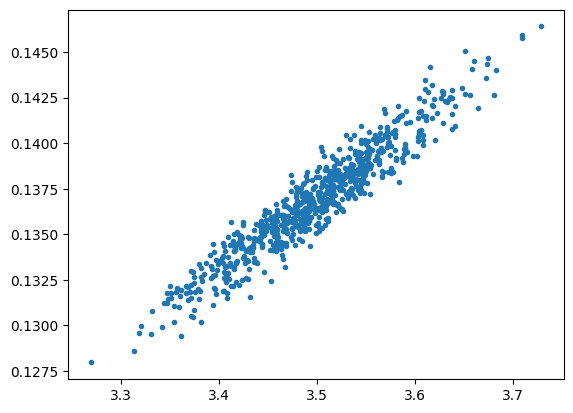

In [26]:
plt.plot(f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.normalized.TD'][:], f['FLASH.SDIAG/BCM.DAQ/FL2.SEED5.1/COMPRESSION.TD'][:], '.')